<a href="https://colab.research.google.com/github/chrisnelsonlab/BMEG4983_2024/blob/main/HW5KEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Treatment group  Time point (days)  Replicate    Gene  Cq Values
0              TG1                  0          1   GAPDH    17.8380
1              TG1                  0          2   GAPDH    17.9820
2              TG1                  0          3   GAPDH    18.1440
3              TG1                 30          1   GAPDH    18.0360
4              TG1                 30          2   GAPDH    17.9100
..             ...                ...        ...     ...        ...
91             TG4                120          2  YRGENE    23.0548
92             TG4                120          3  YRGENE    23.0548
93             TG4                365          1  YRGENE    22.8590
94             TG4                365          2  YRGENE    23.1241
95             TG4                365          3  YRGENE    22.8590

[96 rows x 5 columns]
Gene
GAPDH     17.988
YRGENE    30.050
Name: Cq Values, dtype: float64


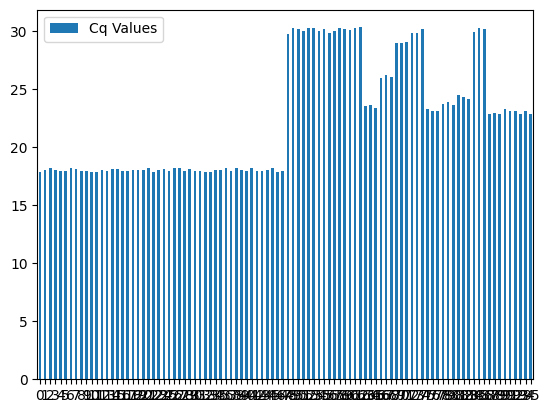

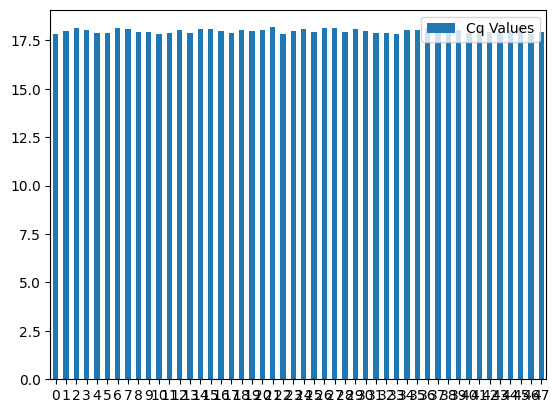

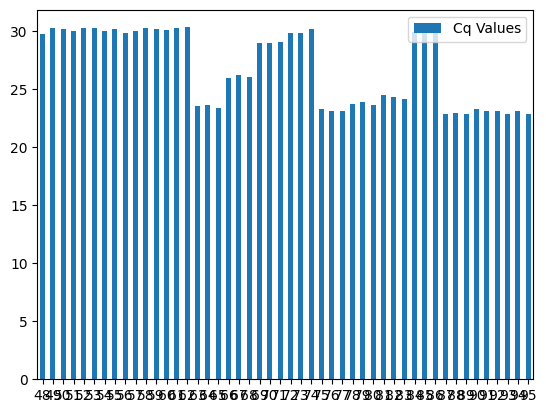

In [24]:
from pandas.core.apply import GroupByApply
from __future__ import print_function
import pandas as pd
pd.__version__


#Read in sample data ##Note, correct name header
qPCR_df = pd.read_csv("https://raw.githubusercontent.com/chrisnelsonlab/BMEG4983/master/PS5_qPCR.csv", sep=",")

#Treatment group,Time point (days),Replicate,Gene,Cq Values
#First let's check to see if the technical replicates are similiar
qPCR_df = qPCR_df.sort_values(["Gene", "Treatment group", "Time point (days)", "Replicate"], ascending = (True, True, True, True))

#Let's reset the index
qPCR_df = qPCR_df.reset_index(drop=True)

#A bar plot that shows all the values in a row. Because we sorted, the values
#next to each other should be the technical replicates.
qPCR_df.plot.bar(rot=0, y='Cq Values')
#What we are looking for here is any crazy outliers from a bad sample.
#Important: Do not discard data. If a technical replicate reads very high or
#very low, that may be a reason to discard later, but always keep all data.

#That was too busy, let's try just GAPDH
qPCR_df.loc[qPCR_df['Gene']== 'GAPDH'].plot.bar(rot=0, y='Cq Values')

#And now just VEGF
qPCR_df.loc[qPCR_df['Gene']== 'YRGENE'].plot.bar(rot=0, y='Cq Values')
print(qPCR_df)

#ChatGPT help
# Filtering DataFrame for TG1 and Time point (days) 0
filtered_df = qPCR_df[(qPCR_df['Treatment group'] == 'TG1') & (qPCR_df['Time point (days)'] == 0)]
# Calculating the average 'Cq Values' for each gene
average_cq_values = filtered_df.groupby('Gene')['Cq Values'].mean()
print(average_cq_values)

delta_Cts = []
for i in range(len(qPCR_df)):
  if(qPCR_df.loc[i, 'Gene']=='YRGENE'):
    delta_Cts.append(qPCR_df.loc[i, 'Cq Values']-average_cq_values.loc['YRGENE'])

  elif(qPCR_df.loc[i, 'Gene']=='GAPDH'):
    delta_Cts.append(qPCR_df.loc[i, 'Cq Values']-average_cq_values.loc['GAPDH'])

  else:
    print('unexpected gene name')

qPCR_df['deltaCt'] = delta_Cts

#Now for the delta delta Ct, we compare to the reference gene (in this case GAPDH)
#Lets break up our dataframe into two by gene (probably should have done that at the beginning)
grouped = qPCR_df.groupby(qPCR_df['Gene'])
df_TR_avg_GAPDH = grouped.get_group("GAPDH")
df_TR_avg_GAPDH = df_TR_avg_GAPDH.reset_index(drop=True)

df_TR_avg_YRGENE = grouped.get_group("YRGENE")
df_TR_avg_YRGENE = df_TR_avg_YRGENE.reset_index(drop=True)

delta_delta_Cts = []
fold_changes = []
for i in range(len(df_TR_avg_YRGENE)):
  delta_delta_Cts.append(df_TR_avg_GAPDH.loc[i,'deltaCt']-df_TR_avg_YRGENE.loc[i,'deltaCt'])
  fold_changes.append(2**(df_TR_avg_GAPDH.loc[i,'deltaCt']-df_TR_avg_YRGENE.loc[i,'deltaCt']))

df_TR_avg_YRGENE['ddCts']=delta_delta_Cts
df_TR_avg_YRGENE['Fold Change']=fold_changes


   Treatment group  Time point (days)  Replicate    Gene  Cq Values  deltaCt  \
0              TG1                  0          1  YRGENE   29.76000 -0.29000   
1              TG1                  0          2  YRGENE   30.27000  0.22000   
2              TG1                  0          3  YRGENE   30.12000  0.07000   
3              TG1                 30          1  YRGENE   30.00000 -0.05000   
4              TG1                 30          2  YRGENE   30.27000  0.22000   
5              TG1                 30          3  YRGENE   30.27000  0.22000   
6              TG1                120          1  YRGENE   29.94000 -0.11000   
7              TG1                120          2  YRGENE   30.12000  0.07000   
8              TG1                120          3  YRGENE   29.85000 -0.20000   
9              TG1                365          1  YRGENE   29.94000 -0.11000   
10             TG1                365          2  YRGENE   30.21000  0.16000   
11             TG1                365   

<ipython-input-38-409da26cbe91>:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x="Treatment group", y="Fold Change", hue='Treatment group',data=df_TR_avg_YRGENE,join=False,dodge=True)
<ipython-input-38-409da26cbe91>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax=sns.pointplot(x="Time point (days)", y="Fold Change", hue='Time point (days)',data=df_TR_avg_YRGENE,join=False,dodge=True)


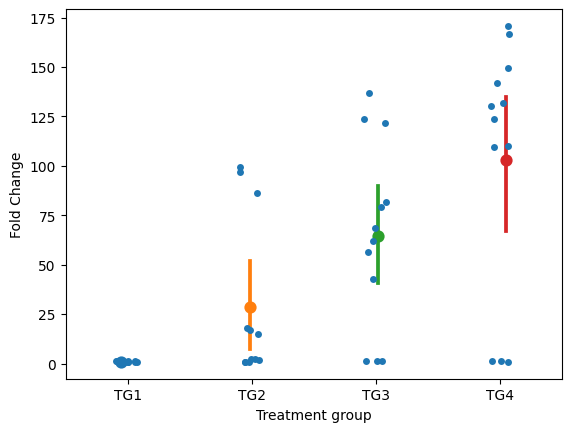

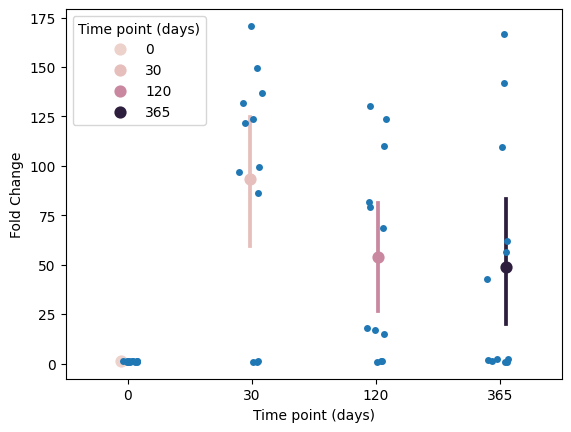

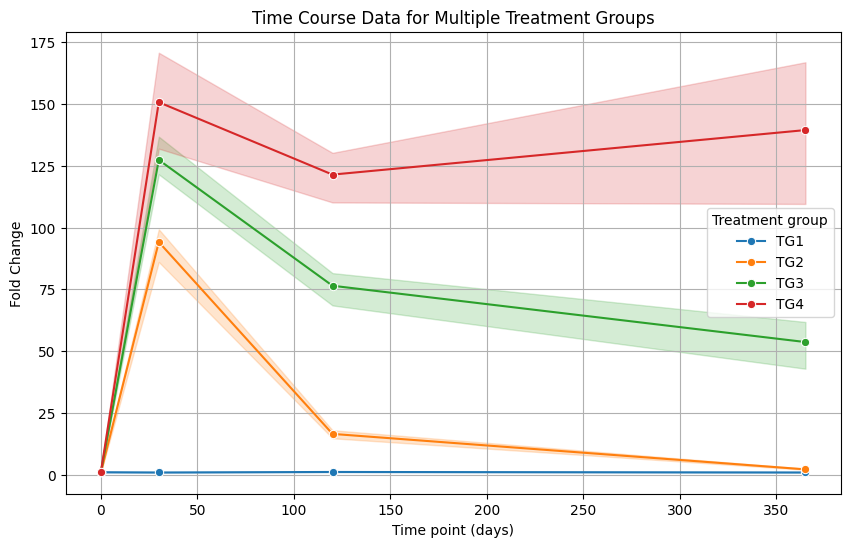

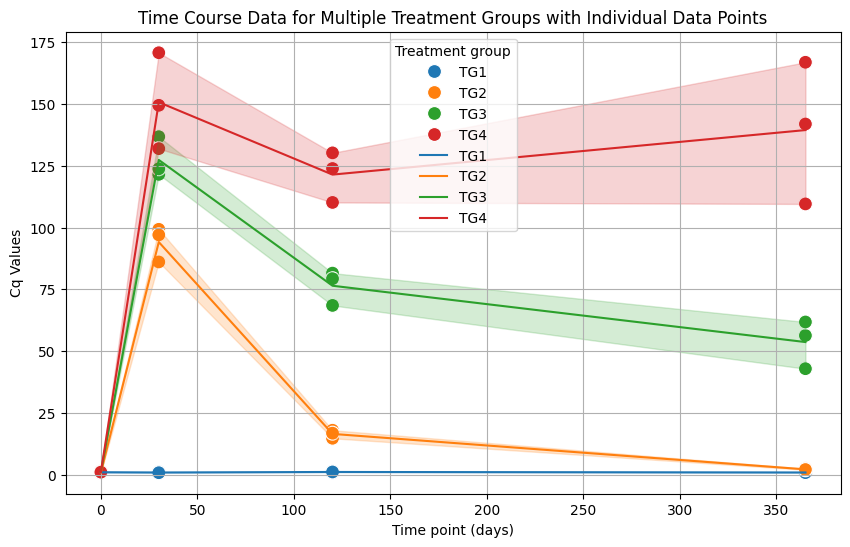

In [38]:
#Now let's plot the fold change
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
print(df_TR_avg_YRGENE)
#sns.stripplot(x=df_TR_avg_VEGF['Treatment'], y=df_TR_avg_VEGF['Fold Change'], jitter=False)
sns.stripplot(x="Treatment group", y="Fold Change", data=df_TR_avg_YRGENE)

ax=sns.pointplot(x="Treatment group", y="Fold Change", hue='Treatment group',data=df_TR_avg_YRGENE,join=False,dodge=True)

plt.figure()
#That hides the timecourse data though. Let's flip
sns.stripplot(x="Time point (days)", y="Fold Change", data=df_TR_avg_YRGENE)
ax=sns.pointplot(x="Time point (days)", y="Fold Change", hue='Time point (days)',data=df_TR_avg_YRGENE,join=False,dodge=True)


#This is an interesting one that shows lines and indicates the distribution
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_TR_avg_YRGENE, x='Time point (days)', y='Fold Change', hue='Treatment group', marker='o')
plt.title('Time Course Data for Multiple Treatment Groups')
plt.xlabel('Time point (days)')
plt.ylabel('Fold Change')
plt.grid(True)
plt.legend(title='Treatment group')
plt.show()



plt.figure(figsize=(10, 6))
# Scatter plot with individual data points
sns.scatterplot(data=df_TR_avg_YRGENE, x='Time point (days)', y='Fold Change', hue='Treatment group', marker='o', s=100)

# Line plot to connect the data points
sns.lineplot(data=df_TR_avg_YRGENE, x='Time point (days)', y='Fold Change', hue='Treatment group')

plt.title('Time Course Data for Multiple Treatment Groups with Individual Data Points')
plt.xlabel('Time point (days)')
plt.ylabel('Fold Change')
plt.grid(True)
plt.legend(title='Treatment group')
plt.show()

#And do some stats.